# Importing Python Machine Learning Libraries
We need to import pandas, numpy and sklearn libraries. 
From sklearn, we need to import preprocessing modules like Imputer. 
The Imputer package helps to impute the missing values.

In [1]:
# Required Python Machine learning Packages
import pandas as pd
import numpy as np
# For preprocessing the data
from sklearn.preprocessing import Imputer
from sklearn import preprocessing
# To split the dataset into train and test datasets
from sklearn.cross_validation import train_test_split
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score

C:\Users\deepa\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Data Import
For importing the housevotes data, we are using pandas read_csv() method. 
This method is a very simple and fast method for importing data.

In [2]:
housevotes = pd.read_csv('C:/Users/deepa/Desktop/1/DA/assignment/New folder/housevotes.csv', engine='python')

# Handling Missing Data
Let’s try to test whether there is any null value in our dataset or not. We can do this using isnull()method.

In [3]:
housevotes.isnull().sum()

Party                                0
handicapped_infants                  0
water_project_cost_sharing           0
adoption_of_the_budget_resolution    0
physician_fee_freeze                 0
el_salvador_aid                      0
religious_groups_in_schools          0
nti_satellite_test_ban               0
aid_to_nicaraguan_contras            0
mx_missile                           0
immigration                          0
synfuels_corporation_cutback         0
education_spending                   0
superfund_right_to_sue               0
crime                                0
duty_free_exports                    0
export_administration_act_sa         0
dtype: int64

# Data preprocessing
For preprocessing, we are going to make a duplicate copy of our original dataframe.
We are duplicating housevotes to housevotes_rev dataframe.

In [4]:
housevotes_rev = housevotes

We are passing an “include” parameter with value as “all”, this is used to specify that we want summary statistics of all the attributes.

In [5]:
housevotes_rev.describe(include= 'all')

,Party,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,nti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_sa
count,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435
unique,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
top,democrat,n,y,y,n,y,y,y,y,y,y,n,n,y,y,n,y
freq,267,236,195,253,247,212,272,239,242,207,216,264,233,209,248,233,269


# One-Hot Encoder
For implementing this, we are going to use LabelEncoder of scikit learn library.

In [6]:
le = preprocessing.LabelEncoder()
housevotes2 = housevotes.apply(le.fit_transform)
housevotes2.head()

,Party,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,nti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_sa
0,1,0,2,0,2,2,2,0,0,0,2,1,2,2,2,0,2
1,1,0,2,0,2,2,2,0,0,0,0,0,2,2,2,0,1
2,0,1,2,2,1,2,2,0,0,0,0,2,0,2,2,0,0
3,0,0,2,2,0,1,2,0,0,0,0,2,0,2,0,0,2
4,0,2,2,2,0,2,2,0,0,0,0,2,1,2,2,2,2


For encoding, we can also use the One-Hot encoder. It encodes the data into binary format.

In [7]:
enc = preprocessing.OneHotEncoder()

# 2. FIT
enc.fit(housevotes2)

# 3. Transform
onehotlabels = enc.transform(housevotes2).toarray()
onehotlabels.shape

(435, 50)

In [8]:
X = housevotes2.drop('Party', axis=1)
y = housevotes2['Party']

from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,
                                                random_state=1)

# Building and training a Logistic Regression model
In statistics, logistic regression, or logit regression, or logit model is a regression model where the dependent variable (DV) is categorical.

In [9]:
#Building and training a Logistic Regression model
import statsmodels.formula.api as sm
logistic1 = sm.logit(formula='Party~handicapped_infants+water_project_cost_sharing+adoption_of_the_budget_resolution+physician_fee_freeze+el_salvador_aid+religious_groups_in_schools+nti_satellite_test_ban+aid_to_nicaraguan_contras+mx_missile+immigration+synfuels_corporation_cutback+education_spending+superfund_right_to_sue+crime+duty_free_exports+export_administration_act_sa', data=housevotes2)
fitted1 = logistic1.fit()
fitted1.summary()

Optimization terminated successfully.
         Current function value: 0.064055
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Party   No. Observations:                  435
Model:                          Logit   Df Residuals:                      418
Method:                           MLE   Df Model:                           16
Date:                Sun, 18 Feb 2018   Pseudo R-squ.:                  0.9040
Time:                        23:31:48   Log-Likelihood:                -27.864
converged:                       True   LL-Null:                       -290.15
                                        LLR p-value:                2.136e-101
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -4.0052      2.589     -1.547      0.122      -9.079       1.069
handicapped_infants                   0.3767      0.540      0.698      0.485      -0.681       1.434
water_project_cost_sharing           -0.7251      0.632     -1.147      0.251      -1.964       0.514
adoption_of_the_budget_resolution    -1.8835      0.511     -3.687      0.000      -2.885      -0.882
physician_fee_freeze                  4.3635      0.854      5.110      0.000       2.690       6.037
el_salvador_aid                       0.6258      1.025      0.611      0.541      -1.382       2.634
religious_groups_in_schools          -0.4286      0.664     -0.645      0.519      -1.731       0.874
nti_satellite_test_ban                0.8887      0.643      1.383      0.167      -0.371       2.149
aid_to_nicaraguan_contras             0.7705      0.975      0.791      0.429      -1.140       2.681
mx_missile                           -1.1839      0.759     -1.559      0.119      -2.672       0.305
immigration                           1.2229      0.553      2.211      0.027       0.139       2.307
synfuels_corporation_cutback         -1.9940      0.573     -3.477      0.001      -3.118      -0.870
education_spending                    0.8404      0.525      1.600      0.110      -0.189       1.870
superfund_right_to_sue               -0.0108      0.560     -0.019      0.985      -1.108       1.087
crime                                -0.3830      0.647     -0.592      0.554      -1.651       0.885
duty_free_exports                    -0.6353      0.500     -1.270      0.204      -1.616       0.345
export_administration_act_sa          0.3221      0.605      0.533      0.594      -0.863       1.508
=====================================================================================================

Possibly complete quasi-separation: A fraction 0.19 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

# predicting values

In [10]:
###predicting values
predicted_values1=fitted1.predict(housevotes2[['handicapped_infants']+['water_project_cost_sharing']+
                                               ['adoption_of_the_budget_resolution']+['physician_fee_freeze']+
                                              ['el_salvador_aid']+['religious_groups_in_schools']+
                                              ['nti_satellite_test_ban']+['aid_to_nicaraguan_contras']+['mx_missile']+
                                              ['immigration']+['synfuels_corporation_cutback']+
                                              ['education_spending']+['superfund_right_to_sue']+['crime']+
                                              ['duty_free_exports']+['export_administration_act_sa']])
predicted_values1[1:10]

1    0.992469
2    0.000141
3    0.000003
4    0.000003
5    0.000036
6    0.905726
7    0.947206
8    0.994531
9    0.000397
dtype: float64

# Converting predicted values into classes using threshold

In [11]:
### Converting predicted values into classes using threshold
threshold=0.5

predicted_class1=np.zeros(predicted_values1.shape)
predicted_class1[predicted_values1>threshold]=1
predicted_class1

array([ 1.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,
        0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,
        0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,
        1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
        0.,  1.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,
        1.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,
        0.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,
        0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,
        1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0

# Confusion matrix
In the field of machine learning, a confusion matrix, also known as an error matrix, is a specific table layout that allows visualization of the performance of an algorithm, typically a supervised learning one

# sensitivity and specificity
Low sensitivity and high specificity. In medical diagnosis, test sensitivity is the ability of a test to correctly identify those with the disease (true positive rate), whereas test specificity is the ability of the test to correctly identify those without the disease (true negative rate).

In [12]:
#Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(housevotes2[['Party']],predicted_class1)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[262   5]
 [  6 162]]
Accuracy :  0.974712643678
Sensitivity :  0.98127340824
Specificity :  0.964285714286


# Converting predicted values into classes using new threshold

In [13]:
### Converting predicted values into classes using new threshold
threshold=0.8

predicted_class1=np.zeros(predicted_values1.shape)
predicted_class1[predicted_values1>threshold]=1
predicted_class1

array([ 1.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,
        0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,
        0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,
        1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
        0.,  1.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,
        1.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,
        0.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,
        0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,
        1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0

In [14]:
#Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(housevotes2[['Party']],predicted_class1)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[265   2]
 [ 10 158]]
Accuracy :  0.972413793103
Sensitivity :  0.992509363296
Specificity :  0.940476190476


# Receiver operating characteristic
In statistics, a receiver operating characteristic (ROC), or ROC curve, is a graphical plot that illustrates the performance of a binary classifier system as its discrimination threshold is varied. The curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.

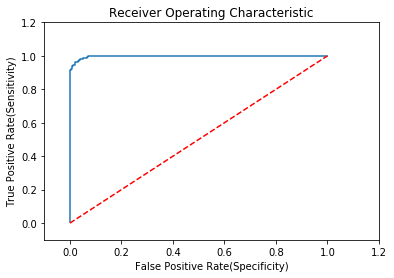

In [15]:
###for visualising the plots use matplotlib and import roc_curve,auc from sklearn.metrics 
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
%matplotlib inline

actual = housevotes2[['Party']]
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predicted_values1)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(Specificity)')
plt.show()

# Cross Validation
Cross-validation, sometimes called rotation estimation, is a model validation technique for assessing how the results of a statistical analysis will generalize to an independent data set. It is mainly used in settings where the goal is prediction, and one wants to estimate how accurately a predictive model will perform in practice.

In [16]:
from sklearn import cross_validation
from sklearn import linear_model
from sklearn import svm
X = housevotes2.drop('Party', axis=1)
y = housevotes2['Party']
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,
                                                random_state=1)
svc = svm.SVC(C=1, kernel='linear')
k_fold = cross_validation.StratifiedKFold(y, n_folds=5)  
# labels, the     number of folders
#for train, test in k_fold:
#    print train, test
scores = cross_validation.cross_val_score(svc, X, y, cv=k_fold, scoring='accuracy') 
# clf.fit() is repeatedly called inside the cross_validation.cross_val_score()
positive_predict_val=cm1[1,0]/(cm1[1,0]+cm1[0,1])
print('postive_predict_val :', positive_predict_val)
negative_predict_val=cm1[0,0]/(cm1[0,0]+cm1[1,0])
print('negative_predict_val :', negative_predict_val)
print (scores)
print ('average score = ', np.mean(scores))
print ('std of scores = ', np.std(scores))

postive_predict_val : 0.833333333333
negative_predict_val : 0.963636363636
[ 0.95454545  0.96590909  0.96551724  0.96511628  0.93023256]
average score =  0.956264124809
std of scores =  0.0136938122021


In [9]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
housevotes = pd.read_csv('C:/Users/deepa/Desktop/1/DA/assignment/New folder/housevotes.csv', engine='python')
housevotes2 = housevotes.apply(le.fit_transform)
import statsmodels.formula.api as sm
logistic1 = sm.logit(formula='Party~handicapped_infants+water_project_cost_sharing+adoption_of_the_budget_resolution+physician_fee_freeze+el_salvador_aid+religious_groups_in_schools+nti_satellite_test_ban+aid_to_nicaraguan_contras+mx_missile+immigration+synfuels_corporation_cutback+education_spending+superfund_right_to_sue+crime+duty_free_exports+export_administration_act_sa', data=housevotes2)
fitted1 = logistic1.fit()
predicted_values1=fitted1.predict(housevotes2[['handicapped_infants']+['water_project_cost_sharing']+
                                               ['adoption_of_the_budget_resolution']+['physician_fee_freeze']+
                                              ['el_salvador_aid']+['religious_groups_in_schools']+
                                              ['nti_satellite_test_ban']+['aid_to_nicaraguan_contras']+['mx_missile']+
                                              ['immigration']+['synfuels_corporation_cutback']+
                                              ['education_spending']+['superfund_right_to_sue']+['crime']+
                                              ['duty_free_exports']+['export_administration_act_sa']])
predicted_class1=np.zeros(predicted_values1.shape)
cm1 = confusion_matrix(housevotes2[['Party']],predicted_class1)
print('Confusion Matrix : \n', cm1)
FP = cm1.sum(axis=0) - np.diag(cm1)  
FN = cm1.sum(axis=1) - np.diag(cm1)
TP = np.diag(cm1)
TN = cm1.sum() - (FP + FN + TP)

print("democrat   republician")
# Sensitivity, hit rate, recall, or true positive rate
Sensitivity = TP/(TP+FN)
print("Sensitivity, hit rate, recall, or true positive rate: ", Sensitivity)
# Specificity or true negative rate
Specificity = TN/(TN+FP) 
print("Specificity or true negative rate :                   ", Specificity)

Optimization terminated successfully.
         Current function value: 0.064055
         Iterations 10
Confusion Matrix : 
 [[267   0]
 [168   0]]
democrat   republician
Sensitivity, hit rate, recall, or true positive rate:  [ 1.  0.]
Specificity or true negative rate :                    [ 0.  1.]
